So, are you interested and check the data?
<br>
You can have a glimpse here, yes you can.

In [1]:
import sys
sys.path.append('/lhome/ific/c/ccortesp/Analysis/libs')

import crudo
import fit_functions as ff
from   iminuit      import Minuit
from   iminuit.cost import LeastSquares
from   invisible_cities.reco.corrections import read_maps                   # type: ignore
from   invisible_cities.reco.corrections import apply_all_correction        # type: ignore
from   invisible_cities.types.symbols    import NormStrategy                # type: ignore
import matplotlib.pyplot as plt                                             # type: ignore  
import numpy as np                                                          # type: ignore
import os
import pandas as pd                                                         # type: ignore
import plotting_tools as pt
import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2

ImportError: attempted relative import with no known parent package

# Preliminary

On July 22th, we started our second period of low-background datataking, under the following detector conditions:
<br>
- __Castle:__ closed.
- __RAS:__ off.

In [ ]:
# List of low-background runs
runs_info = {   
                # ----- P E R I O D  0 1 ----- #
                # Condition 3:  castle = closed & RAS = on #
                15520: {"duration": 85170, "OK": 28050, "LOST": 9130},
                15521: {"duration": 85388, "OK": 28396, "LOST": 8831},
                15527: {"duration": 69725, "OK": 23560, "LOST": 7411},
                15528: {"duration": 41361, "OK": 13460, "LOST": 4426},
                15535: {"duration": 84904, "OK": 28799, "LOST": 9156},
                15539: {"duration": 56567, "OK": 15618, "LOST": 9586},
                15540: {"duration": 67663, "OK": 22526, "LOST": 7066},
                15541: {"duration": 86630, "OK": 29124, "LOST": 9333},
                15542: {"duration": 87915, "OK": 29717, "LOST": 9274},
                15543: {"duration": 86570, "OK": 29160, "LOST": 9123},
                15544: {"duration": 86566, "OK": 29498, "LOST": 9029},
                15545: {"duration": 85892, "OK": 29437, "LOST": 8877},
                15546: {"duration": 84822, "OK": 28663, "LOST": 8704},
                15547: {"duration": 71594, "OK": 24549, "LOST": 7421},
                15557: {"duration": 66088, "OK": 22273, "LOST": 6929},

                # ----- P E R I O D  0 2 ----- #
                
                # Jul 2025: castle = closed & RAS = off #
                # 15609: {"duration": 79563, "OK": 28168, "LOST": 8392},
                # 15614: {"duration": 81279, "OK": 28543, "LOST": 8472},
                # 15615: {"duration": 86302, "OK": 30165, "LOST": 9046},
                # 15616: {"duration": 86146, "OK": 30386, "LOST": 8635},
                # 15617: {"duration": 88041, "OK": 31274, "LOST": 8983},
                # 15618: {"duration": 82577, "OK": 29104, "LOST": 8619},
                # 15619: {"duration": 77964, "OK": 27411, "LOST": 7930},
                # 15621: {"duration": 83287, "OK": 29261, "LOST": 8351},
                # 15622: {"duration": 90371, "OK": 31543, "LOST": 9167},
                # 15623: {"duration": 80748, "OK": 28474, "LOST": 8300},
                # 15624: {"duration": 64650, "OK": 22921, "LOST": 6461},
                # Aug 2025: castle = closed & RAS = on #
                # 15625: {"duration": 87329, "OK": 30498, "LOST": 8570},
                # 15626: {"duration": 107092 , "OK": 37665, "LOST": 10446},
                # 15627: {"duration": 61872, "OK": 21967, "LOST": 6238},
                # 15632: {"duration": 86709, "OK": 30444, "LOST": 8826},
                15633: {"duration": 86076, "OK": 30070, "LOST": 8578},
                15634: {"duration": 86545, "OK": 30372, "LOST": 8234},
                15635: {"duration": 86545, "OK": 30372, "LOST": 9016},
                15636: {"duration": 84284, "OK": 29394, "LOST": 8465},
                15637: {"duration": 76285, "OK": 26571, "LOST": 7422},
                15639: {"duration": 87347, "OK": 30861, "LOST": 8525},
                # 15640: {"duration": 30714, "OK": 10700, "LOST": 3170},
                # 15642: {"duration": 25075, "OK": 8722 , "LOST": 2437},
                # 15643: {"duration": 89049, "OK": 31554, "LOST": 8674},
                # 15644: {"duration": 85486, "OK": 30518, "LOST": 8297},
                # 15645: {"duration": 85729, "OK": 30510, "LOST": 8318},
                # 15647: {"duration": 86629, "OK": 30767, "LOST": 8406},
                # 15648: {"duration": 86466, "OK": 31033, "LOST": 8393},
                # 15649: {"duration": 86270, "OK": 30639, "LOST": 8153},
                # 15650: {"duration": 22096, "OK": 8044 , "LOST": 2227},
                # 15655: {"duration": 80788, "OK": 28802, "LOST": 7950},
                # 15656: {"duration": 85998, "OK": 30696, "LOST": 8311},
                # 15657: {"duration": 86237, "OK": 30399, "LOST": 8587},
                # 15658: {"duration": 86032, "OK": 30601, "LOST": 8224},
                # 15659: {"duration": 86242, "OK": 31012, "LOST": 8390},
                # 15660: {"duration": 85797, "OK": 31112, "LOST": 8269},
                # 15661: {"duration": 76792, "OK": 27556, "LOST": 7183},
                # 15667: {"duration": 46716, "OK": 16472, "LOST": 4611},
                # 15669: {"duration": 81128, "OK": 28934, "LOST": 8059},
                # 15670: {"duration": 86214, "OK": 31038, "LOST": 8499},
                # 15671: {"duration": 86950, "OK": 31309, "LOST": 8268},
                # 15672: {"duration": 86315, "OK": 31207, "LOST": 8214},
                # 15673: {"duration": 81544, "OK": 29419, "LOST": 7850},
                # 15675: {"duration": 85817, "OK": 30257, "LOST": 8928},
                # 15676: {"duration": 79211, "OK": 28268, "LOST": 8289},
                # 15679: {"duration": 83742, "OK": 29177, "LOST": 9790},
                # 15680: {"duration": 85296, "OK": 29183, "LOST": 9747},
                # 15681: {"duration": 86023, "OK": 29606, "LOST": 9625},
                # 15682: {"duration": 65708, "OK": 22534, "LOST": 7483},
                # 15687: {"duration": 86309, "OK": 29497, "LOST": 10048},
                # 15688: {"duration": 0, "OK": 0, "LOST": 0},     # Waiting Jose Maria
                # 15689: {"duration": 85830, "OK": 29836, "LOST": 10086},
                # 15693: {"duration": 86133, "OK": 29546, "LOST": 9912},
                # 15694: {"duration": 86542, "OK": 29877, "LOST": 9894},
                # 15695: {"duration": 86075, "OK": 30004, "LOST": 9982},    
            }

In [3]:
# ----- Data Type ----- #
# Example tags: '_other', '_p2_nhit5', '_nhit5_Qthres7' (this is basically p1_nhit5)
VERSION_TAG = '_nhit5_Qthres7'

# ----- Directories ----- #
DATA_DIR   = '/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/Sophronia/Low_background/'     # Runs per ldc
ICAROS_DIR = '/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/Icaros/Low_background/'        # Kr maps per run
SEL_DIR    = '/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/Backgrounds/h5/runs/'          # Selected events per run

# Paths of the tables inside the HDF5 file. These are the keys used to access the datasets
dorothea  = 'DST/Events'
sophronia = 'RECO/Events'
fiducial_events = 'Event/Electron/Fiducial'
fiducial_hits   = 'Sophronia/Electron/Fiducial'

### Dataframes Categorization

In [4]:
# Store the loaded data here
reco_data = {run_id: {
                        'Dorothea' : {'All': {}, 'Alpha': {}, 'Electron': {}},
                        'Sophronia': {'All': {}, 'Alpha': {}, 'Electron': {}},
                        'Event':     {           'Alpha': {}, 'Electron': {}} 
                    } 
            for run_id in runs_info.keys()}

In [5]:
# Store the selected data here
sel_data = {run_id: {
                        'Sophronia': {'Alpha'   : {'Inclusive': {}, 'Fiducial': {}, 'Tube': {}, 'Anode': {}, 'Cathode': {}}, 
                                      'Electron': {'Inclusive': {}, 'Fiducial': {}, 'Tube': {}, 'Anode': {}, 'Cathode': {}}},
                        'Event':     {'Alpha'   : {'Inclusive': {}, 'Fiducial': {}, 'Tube': {}, 'Anode': {}, 'Cathode': {}}, 
                                      'Electron': {'Inclusive': {}, 'Fiducial': {}, 'Tube': {}, 'Anode': {}, 'Cathode': {}}}
                    } 
            for run_id in runs_info.keys()}

### Global Variables

In [6]:
# ----- Drift Velocity ----- #
V_drift = 0.865     # in [mm/μs]

# ----- NO-Polike Parameters ----- #
m_NOPolike = 0.17;  b_NOPolike = -56

# ----- S1e Correction Parameters ----- #
# Cathode temporal position
DT_stop = 1372.2543         # in [μs]
# Fit values
CV_fit = [0.57, 796.53]     # Run 14739 Fit: χ² / ndof = 1.8480

# ----- Energy Threshold ----- #
Energy_threshold = 3.0      # in [MeV]

# ----- Trigger Threshold ----- #
Trg2_threshold = 0.5        # in [MeV]

# Reconstruction

Load the data as it comes from the NEXT reconstruction chain.

In [ ]:
# ----- Run Loop ----- #
for run_id in runs_info.keys():

    print(f"--- Processing Run {run_id} ---")

    # Run information
    run_OK = runs_info[run_id]['OK']

    # Initialize empty lists to store the dataframes
    run_dst  = []
    run_reco = []
    reco_evts = 0

    # ----- LDC Loop ----- #
    for ldc in range(1, 8):

        # Load the HDF5 file
        h5_path = os.path.join(DATA_DIR, f'run_{run_id}_ldc{ldc}_trg2_sophronia.h5')

        try:
            # ----- Dorothea ----- #
            dst_df = pd.read_hdf(h5_path, key=dorothea)
            reco_evts += dst_df['event'].nunique()     # Number of reco events
            run_dst.append(dst_df)

            # ----- Sophronia ----- #
            reco_df = pd.read_hdf(h5_path, key=sophronia)
            run_reco.append(reco_df)

        except KeyError as e:
            print(f"Warning: Key '{e.args[0]}' not found in file '{h5_path}'. Skipping this file.")

    runs_info[run_id]['Reco_CV'] = reco_evts
    print(f'Loaded: {reco_evts} events ({reco_evts/run_OK:.2%})')

    # ----- Concatenate Data ----- #
    run_dst_df  = pd.DataFrame()
    run_reco_df = pd.DataFrame()

    if run_dst:
        run_dst_df = pd.concat(run_dst, ignore_index=True)

    if run_reco:
        run_reco_df = pd.concat(run_reco, ignore_index=True)

    # ----- Save Combined Data ----- #
    reco_data[run_id]['Dorothea']['All']  = run_dst_df
    reco_data[run_id]['Sophronia']['All'] = run_reco_df

--- Processing Run 15679 ---
Loaded: 28856 events (98.90%)
--- Processing Run 15680 ---
Loaded: 28878 events (98.95%)


# Selection

We usually want to check the _electron fiducial_ population $\rightarrow$ __background__

In [7]:
# ----- Run Loop ----- #
for run_id in runs_info.keys():

    # ----- Sophronia ----- #
    soph_df = pd.read_hdf(SEL_DIR + f'run_{run_id}{VERSION_TAG}.h5', key=fiducial_hits)
    sel_data[run_id]['Sophronia']['Electron']['Fiducial'] = soph_df.copy()

    # ----- Event-like Dataframe ----- #
    evt_df = pd.read_hdf(SEL_DIR + f'run_{run_id}{VERSION_TAG}.h5', key=fiducial_events)
    sel_data[run_id]['Event']['Electron']['Fiducial'] = evt_df.copy()

    print(f"--- Run {run_id} Processed ---")

--- Run 15520 Processed ---
--- Run 15521 Processed ---
--- Run 15527 Processed ---
--- Run 15528 Processed ---
--- Run 15535 Processed ---
--- Run 15539 Processed ---
--- Run 15540 Processed ---
--- Run 15541 Processed ---
--- Run 15542 Processed ---
--- Run 15543 Processed ---
--- Run 15544 Processed ---
--- Run 15545 Processed ---
--- Run 15546 Processed ---
--- Run 15547 Processed ---
--- Run 15557 Processed ---
--- Run 15632 Processed ---
--- Run 15633 Processed ---
--- Run 15634 Processed ---
--- Run 15635 Processed ---
--- Run 15636 Processed ---
--- Run 15637 Processed ---
--- Run 15639 Processed ---
--- Run 15640 Processed ---
--- Run 15642 Processed ---
--- Run 15643 Processed ---
--- Run 15644 Processed ---
--- Run 15645 Processed ---
--- Run 15647 Processed ---
--- Run 15648 Processed ---
--- Run 15649 Processed ---


# Event Rate

In [10]:
CHUNK_SIZE = 2.0  # in [h]

rate_results = {}

# ----- Run Loop ----- #
for run_id, entry in runs_info.items():

    print(f"--- Processing Run {run_id} ---")

    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    # DAQe efficiency + error
    DAQe_CV, DAQe_error = ff.efficiency(run_OK, run_LOST)

    # Dataset
    # doro_df = reco_data[run_id]['Dorothea']['All']
    doro_df = sel_data[run_id]['Event']['Electron']['Fiducial']

    # Event summary 
    event_summary = doro_df.groupby('event').agg(
                                                    time=('time', 'mean')  
    ).reset_index()

    # Time chunks
    time_in_hours  = (event_summary['time'] - event_summary['time'].min()) / 3600
    time_bins = np.arange(0, time_in_hours.max() + 1.001, CHUNK_SIZE)
    time_groups = pd.cut(time_in_hours, bins=time_bins, right=False)

    # Events per chunk
    events_per_chunk = event_summary.groupby(time_groups).size()
    events_per_chunk = events_per_chunk[events_per_chunk > 0]

    # Rate per chunk: corrected by DAQe
    rate_per_chunk       = events_per_chunk / (CHUNK_SIZE * 3600 * DAQe_CV)
    rate_per_chunk_error = np.sqrt(events_per_chunk) / (CHUNK_SIZE * 3600 * DAQe_CV)  # Poisson error

    # Representative points for each time bin (in EPOCH time)
    time_centers = [event_summary['time'].min() + (3600 * interval.mid) for interval in rate_per_chunk.index]
    time_centers_error = [(interval.right - interval.left) * 3600 / 2 for interval in rate_per_chunk.index]

    # Store results
    rate_results[run_id] = {
                                    'time_centers': np.array(time_centers),
                                    'time_err': np.array(time_centers_error),
                                    'rate_hz': rate_per_chunk.values,
                                    'rate_err': rate_per_chunk_error.values
    }

--- Processing Run 15675 ---
--- Processing Run 15676 ---
--- Processing Run 15679 ---
--- Processing Run 15680 ---
--- Processing Run 15681 ---
--- Processing Run 15682 ---
--- Processing Run 15687 ---


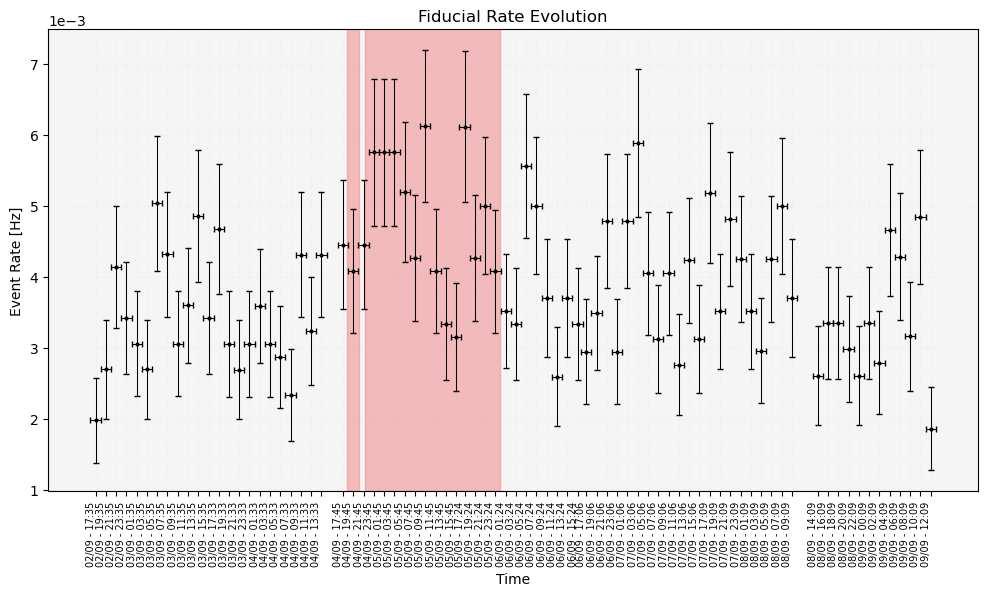

In [12]:
# ---- Plotting ----- #
plt.figure(figsize=(12, 6))

x_centers = []

for i, run_id in enumerate(rate_results.keys()):
    
    results = rate_results[run_id]
    
    plt.errorbar(
        x=results['time_centers'],
        y=results['rate_hz'],      # Ploteamos el promedio de los máximos
        xerr = results['time_err'],
        yerr=results['rate_err'],    # y su error
        fmt='o',
        ms=2,
        c='black',
        ecolor='black',
        elinewidth=0.75,
        capsize=2,
        label=f'Run {run_id}'
    )

    x_centers.extend(results['time_centers'])

outage01 = 1757003520
alive01= 1757011620
plt.axvspan(outage01, alive01, color='lightcoral', alpha=0.5, label='Outage Period')

outage02 = 1757015880
alive02=1757110800
plt.axvspan(outage02, alive02, color='lightcoral', alpha=0.5, label='Outage Period')
# plt.axvline(x=1755529200, color='red', linestyle='--', lw=0.5)
# plt.text(1755529200 + 2e3, 5.5, 'End of Calibration', color='red', fontsize=8, ha='left', va='bottom', rotation=90)

# ----- Styling ----- #
x_labels = [crudo.epoch_converter(t, h=True) for t in x_centers]
plt.xticks(x_centers, x_labels, rotation=90, ha='right', fontsize=7)
plt.xlabel('Time')
plt.ylabel('Event Rate [Hz]')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.title('Fiducial Rate Evolution')
# plt.legend(title='Run ID', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.05)
plt.gca().set_facecolor("whitesmoke")
plt.show()

Basic histogram

--- Processing Run 15650 ---


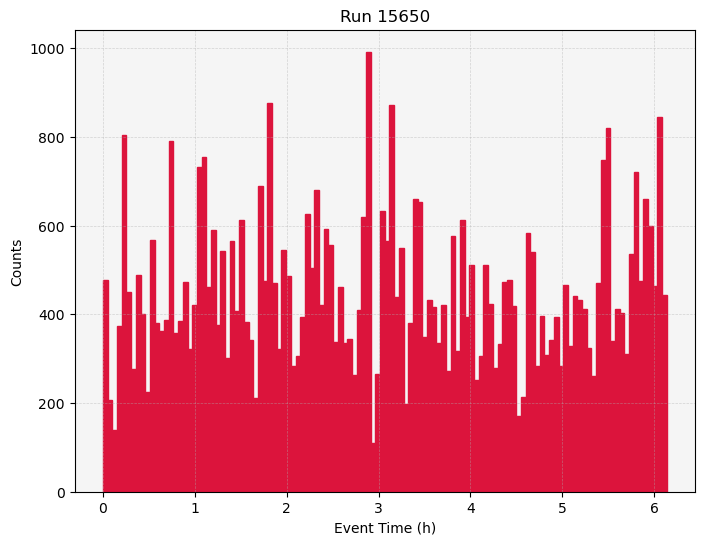

--- Processing Run 15655 ---


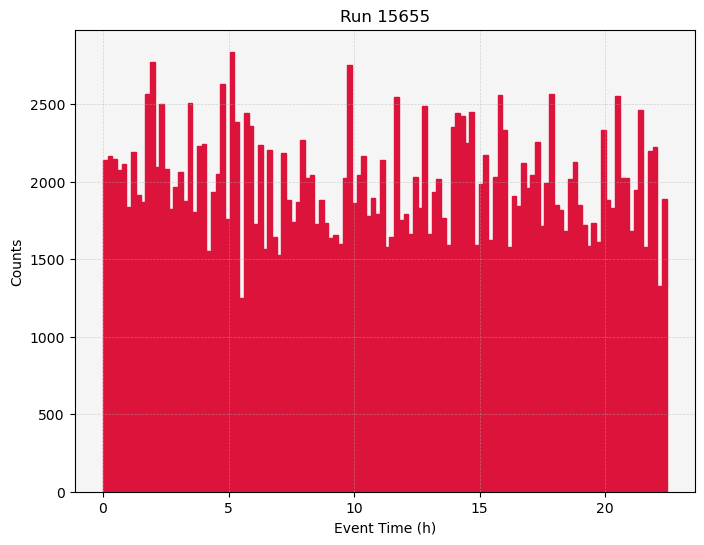

In [17]:
# Global
n_bins = 120

# ----- Run Loop ----- #
for run_id in runs_info.keys():

    print(f"--- Processing Run {run_id} ---")

    # Dataset
    doro_df = reco_data[run_id]['Dorothea']['All']

    # Variables
    time = (doro_df['time'] - doro_df['time'].min()) / 3600     # in [h]

    # Histogram: normalized by corrected DAQ data taking time
    time_counts, time_edges = np.histogram(time, bins=n_bins)
    # time_rate = time_counts / DAQ_time

    # ----- Plotting ----- #
    plt.figure(figsize=(8, 6))
    plt.stairs(time_counts, time_edges, fill=True,
               color=pt.hist_colors[1], lw=1.0, ec=pt.hist_colors[1])

    # Styling
    plt.xlabel('Event Time (h)')
    plt.ylabel('Counts')
    # plt.yscale('log')
    plt.title(f'Run {run_id}')
    # plt.legend(loc='upper left', fontsize=10)

    plt.grid(True, ls='--', lw=0.5, alpha=0.5)
    plt.gca().set_facecolor("whitesmoke")
    plt.show()

# Multiplicity

In [ ]:
# Storage of information
multiplicty_results = {}

# ----- Run Loop ----- #
for run_id in runs_info.keys():

    print(f"--- Processing Run {run_id} ---")

    # Dataset
    doro_df = reco_data[run_id]['Dorothea']['All']

    # Event summary
    event_summary = doro_df.groupby('event').agg(
                                                    nS1_max=('nS1', 'max'),     
                                                    time=('time', 'mean')  
    ).reset_index()

    # Time chunks
    time_in_hours  = (event_summary['time'] - event_summary['time'].min()) / 3600       # Convert time to hours
    time_bins = np.arange(0, time_in_hours.max() + 1.001, 2)                            # One bin per hour
    time_groups = pd.cut(time_in_hours, bins=time_bins, right=False)

    # Average nS1 multiplicity per event per hour
    hourly_stats = event_summary.groupby(time_groups)['nS1_max'].agg(['mean', 'sem'])
    hourly_stats = hourly_stats.dropna()

    # Representative points for each time bin (in EPOCH time)
    time_centers = [event_summary['time'].min() + (3600 * interval.mid) for interval in hourly_stats.index]

    # Store results
    multiplicty_results[run_id] = {
                                    'time_centers': np.array(time_centers),
                                    'nS1_mean': hourly_stats['mean'].values,
                                    'nS1_sem': hourly_stats['sem'].values
    }

--- Processing Run 15649 ---
--- Processing Run 15650 ---
--- Processing Run 15655 ---
--- Processing Run 15656 ---
--- Processing Run 15657 ---


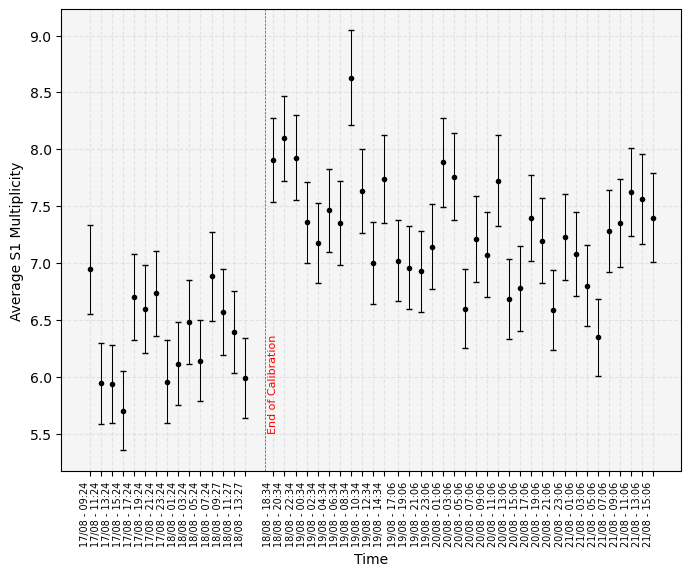

In [51]:
# ---- Plotting ----- #
plt.figure(figsize=(8, 6))

x_centers = []

for i, run_id in enumerate(multiplicty_results.keys()):
    
    results = multiplicty_results[run_id]
    
    plt.errorbar(
        x=results['time_centers'],
        y=results['nS1_mean'],      # Ploteamos el promedio de los máximos
        yerr=results['nS1_sem'],    # y su error
        fmt='o',
        ms=3,
        c='black',
        ecolor='black',
        elinewidth=0.75,
        capsize=2,
        label=f'Run {run_id}'
    )

    x_centers.extend(results['time_centers'])


plt.axvline(x=1755529200, color='red', linestyle='--', lw=0.5)
plt.text(1755529200 + 2e3, 5.5, 'End of Calibration', color='red', fontsize=8, ha='left', va='bottom', rotation=90)

# ----- Styling ----- #
x_labels = [crudo.epoch_converter(t, h=True) for t in x_centers]
plt.xticks(x_centers, x_labels, rotation=90, ha='right', fontsize=7)
plt.xlabel('Time')
plt.ylabel('Average S1 Multiplicity') 
# plt.legend(title='Run ID', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.25)
plt.gca().set_facecolor("whitesmoke")
plt.show()

# Comparison of Period 01 - 02

In [8]:
# Are you sure they are comparable?
test_01 = sel_data[15539]['Sophronia']['Electron']['Fiducial']
test_02 = sel_data[15632]['Sophronia']['Electron']['Fiducial']

print(f"P01: Qmin = {test_01['Q'].min():.6f} pe\nP02: Qmin = {test_02['Q'].min():.6f} pe")

P01: Qmin = 7.000267 pe
P02: Qmin = 7.000087 pe


## Event Rate

In [25]:
# Storage
Date_CV = [];  Date_Err = []
Rate_CV = [];  Rate_Err = []
Run_numbers = []

# ----- Run Loop ----- #
for run_id, entry in runs_info.items():

    print(f"--- Processing Run {run_id} ---")

    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # DAQe efficiency + error
    DAQe_CV, DAQe_error = ff.efficiency(run_OK, run_LOST)

    # ----- Event-like Dataframe ----- #
    evt_df = sel_data[run_id]['Event']['Electron']['Fiducial']

    # Date + error for each run
    Date_CV.append(evt_df['time'].mean())
    Date_Err.append(evt_df['time'].std() / np.sqrt(len(evt_df)))

    # Rate + error for each run
    fidu_evts = evt_df['event'].nunique()
    print(f'Events = {fidu_evts}, Duration = {run_long} s, DAQe = {DAQe_CV:.4f} ± {DAQe_error:.4f}')
    fidu_CV, fidu_var = scipy.stats.binom.stats(n=run_OK, p=fidu_evts/run_OK, moments='mv')

    rate_CV  = fidu_CV / (run_long * DAQe_CV)
    rate_err = rate_CV * np.sqrt((np.sqrt(fidu_var) / fidu_CV)**2 + (DAQe_error / DAQe_CV)**2) 
    print(f'Rate   = {rate_CV*1e3:.4f} ± {rate_err*1e3:.4f} mHz\n')
    
    Rate_CV.append(rate_CV)
    Rate_Err.append(rate_err)

--- Processing Run 15520 ---
Events = 296, Duration = 85170 s, DAQe = 0.7544 ± 0.0022
Rate   = 4.6066 ± 0.2667 mHz

--- Processing Run 15521 ---
Events = 275, Duration = 85388 s, DAQe = 0.7628 ± 0.0022
Rate   = 4.2222 ± 0.2537 mHz

--- Processing Run 15527 ---
Events = 217, Duration = 69725 s, DAQe = 0.7607 ± 0.0024
Rate   = 4.0912 ± 0.2768 mHz

--- Processing Run 15528 ---
Events = 125, Duration = 41361 s, DAQe = 0.7525 ± 0.0032
Rate   = 4.0159 ± 0.3579 mHz

--- Processing Run 15535 ---
Events = 300, Duration = 84904 s, DAQe = 0.7588 ± 0.0022
Rate   = 4.6568 ± 0.2678 mHz

--- Processing Run 15539 ---
Events = 159, Duration = 56567 s, DAQe = 0.6197 ± 0.0031
Rate   = 4.5361 ± 0.3586 mHz

--- Processing Run 15540 ---
Events = 221, Duration = 67663 s, DAQe = 0.7612 ± 0.0025
Rate   = 4.2907 ± 0.2875 mHz

--- Processing Run 15541 ---
Events = 273, Duration = 86630 s, DAQe = 0.7573 ± 0.0022
Rate   = 4.1612 ± 0.2510 mHz

--- Processing Run 15542 ---
Events = 297, Duration = 87915 s, DAQe = 0.

#### Linear Fits

In [26]:
def const_func(x, a):
    return ff.linear_func(x, 0, a)

# Storage
Period_info = {1: {}, 2: {}}

# Important date
P2_START = 1753178400       # Start of period 02

# ----- Linear Fit ----- #
# Preliminary
Date_CV  = np.array(Date_CV);        Date_Err = np.array(Date_Err)
Rate_CV  = np.array(Rate_CV);        Rate_Err = np.array(Rate_Err)

# Masking for each period
P1_time = (Date_CV < P2_START);      P2_time = (Date_CV >= P2_START)

for i, period in enumerate([P1_time, P2_time]):

    print(f'--- Period 0{i+1} ---')

    # Data selection
    x_data = Date_CV[period]
    y_data = Rate_CV[period]
    y_err  = Rate_Err[period]

    # Shifted time
    x_shift = (x_data - x_data[0]) / 3600   # In [hr] for numeric stability

    # Define the cost function + initial guess
    least_squares = LeastSquares(x_shift, y_data, y_err, const_func)
    init_guess = [y_data.min()]

    # print(f'\nFit 0{i+1}:\nInitial guess: {init_guess}')

    # Define the Minuit object
    m = Minuit(least_squares, *init_guess)

    # Minimization process of the cost function and error estimation
    m.migrad()
    m.hesse()

    # Results
    popt = m.values;  perr = m.errors
    print(f"Rate of Fiducial Background: ({popt[0]*1e3:.2f} ± {perr[0]*1e3:.2f}) mHz")
    Period_info[i+1]['Rate_CV']  = popt[0]
    Period_info[i+1]['Rate_Err'] = perr[0]

    # Reduced chi-square
    chi2 = m.fval
    ndof = len(x_shift) - m.nfit
    print(f"χ² / ndof = {chi2 / ndof:.4f}\n")
    Period_info[i+1]['Red_Chi2'] = chi2 / ndof

    # Fits
    x_fit = (x_shift * 3600) + x_data[0]  # In [s]
    y_fit = const_func(x_shift, *popt)
    Period_info[i+1]['x_fit'] = x_fit
    Period_info[i+1]['y_fit'] = y_fit

--- Period 01 ---
Rate of Fiducial Background: (4.42 ± 0.07) mHz
χ² / ndof = 0.9033

--- Period 02 ---
Rate of Fiducial Background: (3.76 ± 0.06) mHz
χ² / ndof = 1.3588



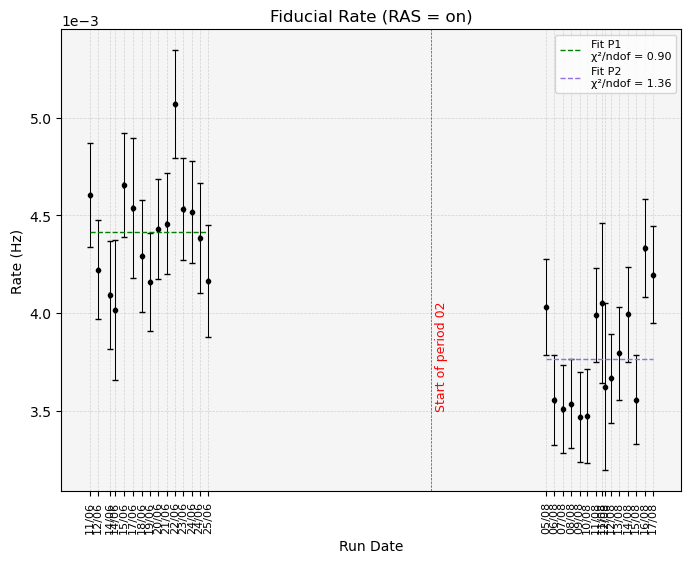

Ratio of Rates (P2 / P1): R = 0.8521 ± 0.0199


In [29]:
# ----- Plotting ----- #
plt.figure(figsize=(8, 6))

# Data
plt.errorbar(Date_CV, Rate_CV, xerr=Date_Err, yerr=Rate_Err, fmt='o', ms=3, c='black', ecolor='black', elinewidth=0.75, capsize=2)

# Fits
for i in [1, 2]:
    plt.plot(Period_info[i]['x_fit'], Period_info[i]['y_fit'], color=pt.hist_colors[4*i % len(pt.hist_colors)], ls='--', lw=1.0, label=f'Fit P{i}\nχ²/ndof = {Period_info[i]["Red_Chi2"]:.2f}')

# Important dates
plt.axvline(x=P2_START, color='red', linestyle='--', lw=0.5)
plt.text(P2_START + 4e4, 3.5e-3, 'Start of period 02', color='red', fontsize=9, ha='left', va='bottom', rotation=90)

# Styling
x_labels = [crudo.epoch_converter(t, h=False) for t in Date_CV]        # Convert x-axis bin edges to readable time format
plt.xticks(Date_CV, x_labels, rotation=90, ha='center', fontsize=8)
plt.xlabel('Run Date')
plt.ylabel('Rate (Hz)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.legend(loc='upper right', fontsize=8)
plt.title('Fiducial Rate (RAS = on)')

plt.grid(True, ls='--', lw=0.5, alpha=0.5)
plt.gca().set_facecolor("whitesmoke")
plt.show()

# ---- Ratio of Rates (RAS = on) ---- #
R_CV  = Period_info[2]['Rate_CV'] / Period_info[1]['Rate_CV']
R_Err = R_CV * np.sqrt( (Period_info[1]['Rate_Err'] / Period_info[1]['Rate_CV'])**2 + (Period_info[2]['Rate_Err'] / Period_info[2]['Rate_CV'])**2 )
print(f'Ratio of Rates (P2 / P1): R = {R_CV:.4f} ± {R_Err:.4f}')